---------------------------------------------------------------------------------------------------------------------------
This tutorial relies on the example model provided by `dinsar`, which is built from real public datasets belonging to a small area near the Doñana National Park (southern Spain). The model can be accessed directly through  `dinsar.example.get_model()` and the relative paths to the data, through `dinsar.example.get_path()`.
For more information about the data sources, see the file *Data Sources.txt*, located in the same folder as this tutorial.

Fore **more information** about the use of any function, method, class o moduel, use `help` bult-in (or `?`) to acces its documentation:

`>>> help(dinsar.parts)` or press the **tabulator** key in Jupyter Notebook to access an object's methods.

---------------------------------------------------------------------------------------------------------------------------

<h1><center>Working with  model parts</center></h1>

In [1]:
 # Cojo los cinco primeros PS del Dataset 'Ascending' (dessde fuera del modelo ) y calculo su deformación promedio
ps = Asc.ps[0:5] 
Asc.subset(ps).plot(plot_average=True)

# Cojo el primer piezómetro de la base de datos de piezometría y ploteo su serie temporal
piezo = bbdd.piezos[0]
bbdd.plot(piezo)

# A través del método 'take' accedo al array con su serie tempral: --> bbdd.take(piezo)

# Selecciono la estación de Almonte y ploteo su serie temporal según su desviación acumulada
# Puedo ver qué estaciones hay en la base de datos así: --> precipi.estaciones
precipi.plot('Almonte', values='dsv')

precipi.estaciones

NameError: name 'Asc' is not defined

In [1]:
import dinsar

Doñana = dinsar.example.get_model()

Geometría añadida correctamente.
Geometría añadida correctamente.


<AxesSubplot:title={'center':'Asc - puntos'}, ylabel='Deformación (cm)'>

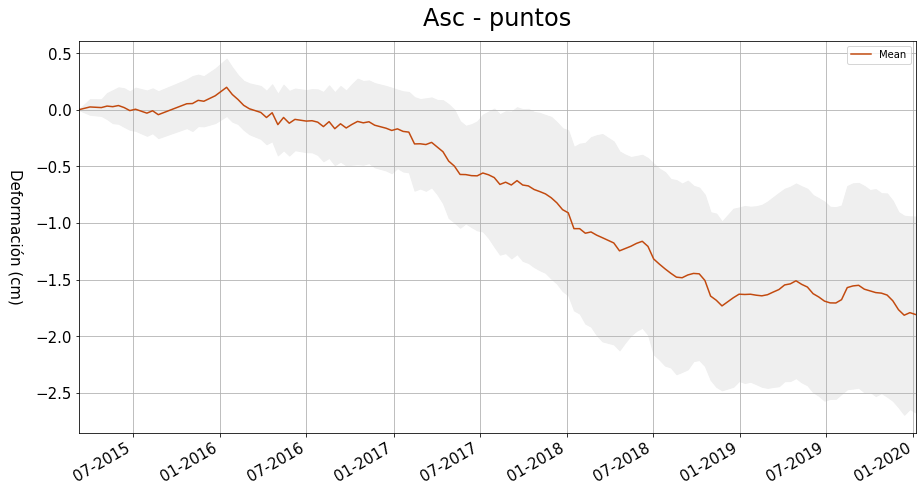

In [2]:
Doñana.get('Asc').plot(['352866', '352918', '353090',  '353226', '353378', '353502'])

<AxesSubplot:title={'center':'Estaciones pluviométricas'}, xlabel='Fechas', ylabel='Precipitación (mm)'>

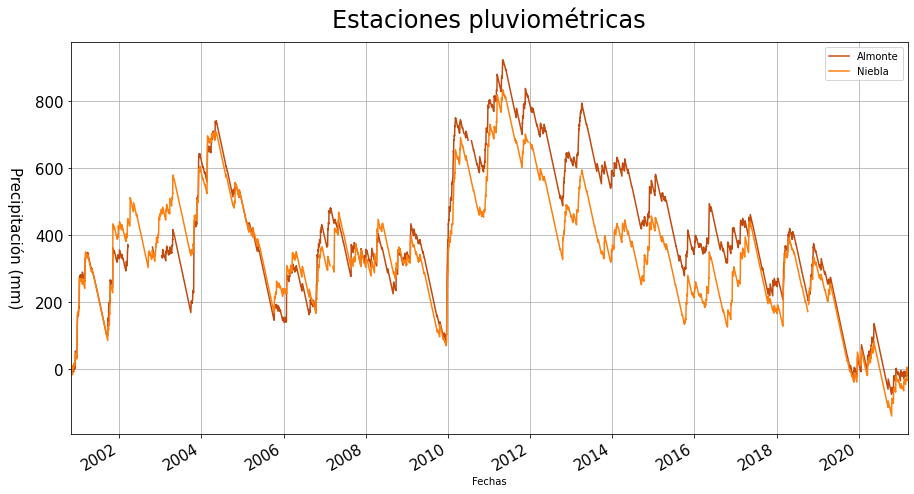

In [3]:
Doñana.get('P').plot(['Almonte', 'Niebla'])

In [4]:
Doñana.get('Piezo_bbdd').piezos

['104080065', '104130038', '104170015', '104240124', '114150046', '104140056']